In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [76]:
#import dataset
import numpy as np
import pandas as pd

tw_df = pd.read_json('Data/iain_rankin.json', lines=True) 
tw_df.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1416898386029068289,1416898386029068288,2021-07-19 04:41:14 India Standard Time,2021-07-19,04:41:14,530,627598217,iaintrankin,Iain Rankin,,...,,,,,,[],,,,
1,1416845991056232451,1416845991056232448,2021-07-19 01:13:02 India Standard Time,2021-07-19,01:13:02,530,627598217,iaintrankin,Iain Rankin,,...,,,,,,[],,,,
2,1416813409312587779,1416813409312587776,2021-07-18 23:03:34 India Standard Time,2021-07-18,23:03:34,530,627598217,iaintrankin,Iain Rankin,,...,,,,,,[],,,,


In [77]:
#breaking into lines
all_sentences = []

for word in tw_df['tweet']:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['Across', 'the', 'province,', 'our', '@LiberalPartyNS', 'candidates', 'are', 'geared', 'up', 'and', 'ready', 'to', 'go.', 'Today', 'I', 'joined', 'Kelly', 'Regan', 'in', 'Bedford,', '@ColinCoadyHFX', 'in', 'Halifax', 'Needham,', 'and', '@Aliduale1', 'in', 'Halifax', 'Armdale', 'as', 'they', 'opened', 'up', 'their', 'campaign', 'headquarters.', 'https://t.co/v0Q23cGP0a', 'Doors', 'open!', 'You', 'can', 'stop', 'by', 'my', 'local', 'Timberlea-Prospect', 'campaign', 'office', 'to', 'get', 'a', 'lawn', 'sign,', 'schedule', 'a', 'canvassing', 'shift,', 'or', 'learn', 'more', 'about', 'the', '@LiberalPartyNS', 'vision', 'for', 'Nova', 'Scotia.', 'Thanks', 'to', 'Team', 'Rankin', 'for', 'being', 'part', 'of', 'our', 'official', 'opening.', 'https://t.co/lPSKhxFglg', 'Hitting', 'the', 'doors', 'with', 'Team', 'Rankin', 'volunteers', 'in', 'Timberlea-Prospect.', 'It’s', 'been', 'a', 'privilege', 'to', 'represent', 'this', 'vibrant', 'constituency', 'since', '2013,', 'and', 'I’ll', 'keep', 'wor

In [78]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [79]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['across',
 'the',
 'provinc',
 'our',
 'liberalpartyn',
 'candid',
 'are',
 'gear',
 'up',
 'and',
 'readi',
 'to',
 'go',
 'today',
 'i',
 'join',
 'kelli',
 'regan',
 'in',
 'bedford',
 'colincoadyhfx',
 'in',
 'halifax',
 'needham',
 'and',
 'aliduale1',
 'in',
 'halifax',
 'armdal',
 'as',
 'they',
 'open',
 'up',
 'their',
 'campaign',
 'headquart',
 'httpstcov0q23cgp0a',
 'door',
 'open',
 'you',
 'can',
 'stop',
 'by',
 'my',
 'local',
 'timberleaprospect',
 'campaign',
 'offic',
 'to',
 'get',
 'a',
 'lawn',
 'sign',
 'schedul',
 'a',
 'canvass',
 'shift',
 'or',
 'learn',
 'more',
 'about',
 'the',
 'liberalpartyn',
 'vision',
 'for',
 'nova',
 'scotia',
 'thank',
 'to',
 'team',
 'rankin',
 'for',
 'be',
 'part',
 'of',
 'our',
 'offici',
 'open',
 'httpstcolpskhxfglg',
 'hit',
 'the',
 'door',
 'with',
 'team',
 'rankin',
 'volunt',
 'in',
 'timberleaprospect',
 'it',
 'been',
 'a',
 'privileg',
 'to',
 'repres',
 'this',
 'vibrant',
 'constitu',
 'sinc',
 '2013',
 'and',
 

In [80]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['provinc',
 'liberalpartyn',
 'candid',
 'gear',
 'readi',
 'today',
 'join',
 'kelli',
 'regan',
 'bedford',
 'colincoadyhfx',
 'halifax',
 'needham',
 'aliduale1',
 'halifax',
 'armdal',
 'open',
 'campaign',
 'headquart',
 'httpstcov0q23cgp0a',
 'door',
 'open',
 'stop',
 'local',
 'timberleaprospect',
 'campaign',
 'offic',
 'lawn',
 'sign',
 'schedul',
 'canvass',
 'shift',
 'learn',
 'liberalpartyn',
 'vision',
 'nova',
 'scotia',
 'thank',
 'team',
 'rankin',
 'offici',
 'open',
 'httpstcolpskhxfglg',
 'hit',
 'door',
 'team',
 'rankin',
 'volunt',
 'timberleaprospect',
 'privileg',
 'repres',
 'vibrant',
 'constitu',
 'sinc',
 '2013',
 'ill',
 'work',
 'hard',
 'earn',
 'vote',
 'august',
 '17th',
 'httpstcoenjx4wz80v',
 'liber',
 'plan',
 'nova',
 'scotia',
 'forward',
 'capit',
 'opportun',
 'right',
 'befor',
 'join',
 'togeth',
 'continu',
 'invest',
 'peopl',
 'grow',
 'economi',
 'build',
 'provinc',
 'everyon',
 'chanc',
 'succeed',
 'nspoli',
 'httpstcojvfnzpu0pa',
 'k

In [81]:
tw_df_st = pd.DataFrame(stem2)

tw_df_st = tw_df_st[0].value_counts()

In [82]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in tw_df_st:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 1223, 2: 315, 3: 181, 4: 107, 5: 66, 6: 44, 7: 37, 8: 34, 10: 19, 9: 16, ...})

In [37]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


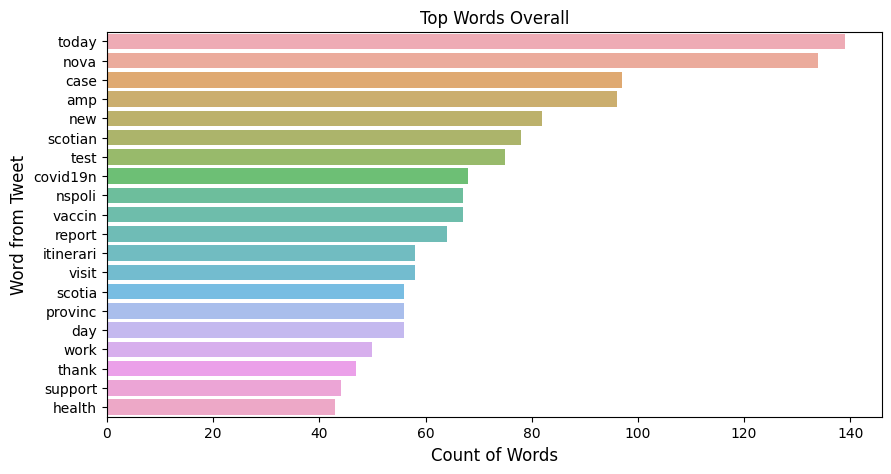

In [83]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

tw_df_st = tw_df_st[:20,]
plt.figure(figsize=(10,5))
sns.barplot(tw_df_st.values, tw_df_st.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [39]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [26]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [84]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


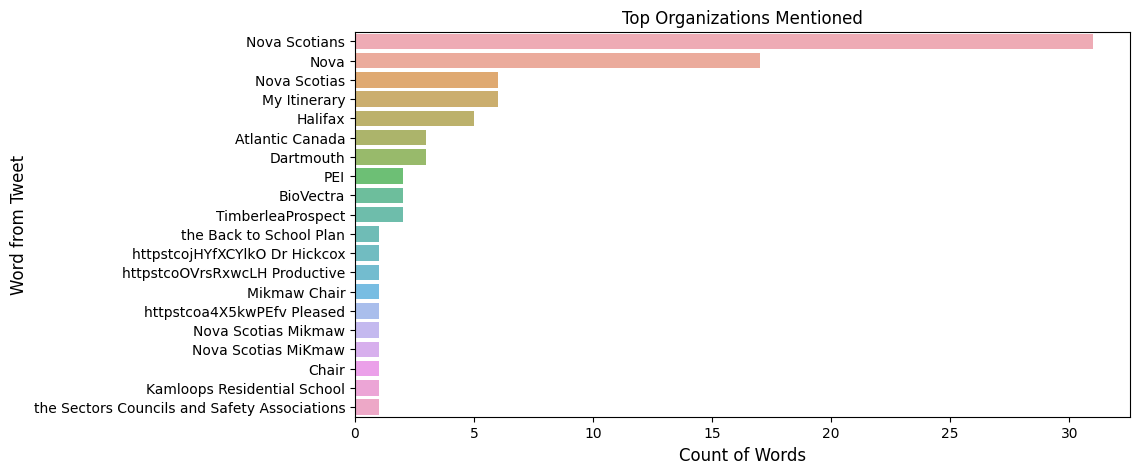

In [85]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [86]:
df.to_csv("king_rankin.csv")